# **Import and Install Dependencies**

In [ ]:
%pip install mediapipe --user

In [5]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# **Access using Using MediaPipe**

In [26]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [25]:
def media_pipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) 
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR) 
    return image, results

In [24]:
def draw_land_marks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [23]:
def draw_styled_handmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION , 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
   
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
      
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
     
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [28]:
cap = cv.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        black_bg = np.zeros((frame.shape[0], frame.shape[1], frame.shape[2]))

        image, results = media_pipe_detection(frame, holistic)
        
        draw_land_marks(image, results)

        cv.imshow('Media Pipe Test', image)
        
        if(cv.waitKey(10) & 0xFF == ord('q')):
            break

cap.release()
cv.destroyAllWindows()

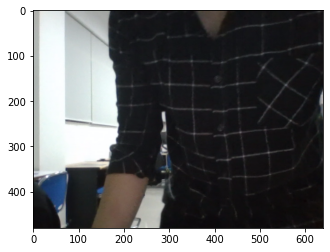

In [29]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [8]:
cap = cv.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        black_bg = np.zeros((frame.shape[0], frame.shape[1], frame.shape[2]))

        image, results = media_pipe_detection(frame, holistic)
        
        draw_land_marks(black_bg, results)

        cv.imshow('Media Pipe Test', black_bg)
        
        if(cv.waitKey(10) & 0xFF == ord('q')):
            break

cap.release()
cv.destroyAllWindows()

# **Extract Keypoint Values**

In [31]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [6]:
# len(pose)

468*4 + 33 * 3 + 21 * 3 + 21 * 3

2097

In [12]:
def extract_keypoints(results):
    # face = np.array([[res.x, res.y] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*2)
    pose = np.array([[res.x, res.y] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*2)
    left_hand = np.array([[res.x, res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*2)
    right_hand = np.array([[res.x, res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*2)
    # return np.concatenate([pose, face, left_hand, right_hand])
    return np.concatenate([[pose, left_hand, right_hand]])

In [13]:
def extract_coordinate(results):
    # if results.face_landmarks:
    #     for res in results.face_landmarks.landmark:
    #         x = res.x
    #         y = res.y
    #         visibility = res.visibility
    #         print(f"FACE LANDMARK x: {x}, y: {y}\n")
    if results.pose_landmarks:
        for res in results.pose_landmarks.landmark:
            x = res.x
            y = res.y
            print(f"POSE LANDMARK x: {x}, y: {y}\n")
    if results.right_hand_landmarks:
        for res in results.right_hand_landmarks.landmark:
            x = res.x
            y = res.y
            print(f"RIGHT HAND LANDMARK x: {x}, y: {y}\n")
    if results.left_hand_landmarks:
        for res in results.left_hand_landmarks.landmark:
            x = res.x
            y = res.y
            print(f"LEFT HAND LANDMARK x: {x}, y: {y}\n")    

In [1]:
extract_coordinate(results)

NameError: name 'extract_coordinate' is not defined

In [150]:
extract_keypoints(results)

array([ 0.56066555,  0.24537517, -0.42585683, ...,  0.5358575 ,
        0.84843647, -0.03454136])

In [149]:
len(extract_keypoints(results))

2130

In [5]:
33*2 + 21*2 + 21*2

150

In [47]:
len(extract_keypoints(results))

2130

# **Setup Folders for Collection**

In [33]:
DATA_PATH = os.path.join('Sign_Data')

actions = np.array(['maaf', 'tolong', 'terimakasih'])

# menggunakan 30 video
no_sequences = 30

# setiap video berisi 30 frame
sequence_length = 30

start_folder = 30

In [34]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# **Collect Keypoint Values for Training and Testing**

In [98]:
cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = media_pipe_detection(frame, holistic)

                draw_styled_handmarks(image, results)
                
                if frame_num == 0: 
                    cv.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv.LINE_AA)
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)
                    cv.imshow('OpenCV Feed', image)
                    cv.waitKey(2000)
                else: 
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)
                    cv.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                np.save(npy_path, keypoints)
                
                cv.imwrite(os.path.join(DATA_PATH, action, str(sequence), str(frame_num)), image)

                if cv.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv.destroyAllWindows()

In [250]:
cap.release()
cv.destroyAllWindows()

# **Preprocess Data and Create Labels and Features**

In [184]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
import keras

In [185]:
label_map = {label:num for num, label in enumerate(actions)}

In [186]:
label_map

{'maaf': 0, 'tolong': 1, 'terimakasih': 2}

In [187]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [188]:
np.array(sequences).shape

(90, 30, 2130)

In [189]:
np.array(labels).shape

(90,)

In [190]:
X = np.array(sequences)

In [191]:
X.shape

(90, 30, 2130)

In [192]:
y = to_categorical(labels).astype(int)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [194]:
y_test.shape

(5, 3)

# **Build and Train LSTM Neural Network**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [26]:
model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,2130)))
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,150)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [198]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [199]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 3s 67ms/step - loss: 1.1782 - categorical_accuracy: 0.2824
Epoch 2/200
3/3 [==============================] - 0s 64ms/step - loss: 1.1108 - categorical_accuracy: 0.3176
Epoch 3/200
3/3 [==============================] - 0s 67ms/step - loss: 1.1205 - categorical_accuracy: 0.3294
Epoch 4/200
3/3 [==============================] - 0s 67ms/step - loss: 1.1001 - categorical_accuracy: 0.3294
Epoch 5/200
3/3 [==============================] - 0s 65ms/step - loss: 1.0987 - categorical_accuracy: 0.3294
Epoch 6/200
3/3 [==============================] - 0s 67ms/step - loss: 1.0992 - categorical_accuracy: 0.2471
Epoch 7/200
3/3 [==============================] - 0s 65ms/step - loss: 1.0944 - categorical_accuracy: 0.4000
Epoch 8/200
3/3 [==============================] - 0s 66ms/step - loss: 1.0652 - categorical_accuracy: 0.3647
Epoch 9/200
3/3 [==============================] - 0s 67ms/step - loss: 1.0372 - categorical_accuracy: 0.3059
Epoch 10/2

In [2]:
model.summary()

NameError: name 'model' is not defined

# **Make Predictions**

In [201]:
res = model.predict(X_test)

1/1 [==============================] - 0s 307ms/step


In [202]:
actions[np.argmax(res[4])]

'tolong'

In [203]:
actions[np.argmax(y_test[4])]

'tolong'

# **Save Weights**

In [204]:
model.save('action.h5')

C:\Users\krisn\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
# del model

NameError: name 'model' is not defined

In [27]:
model.load_weights('action.h5')

# **Evaluation using Confusion Matrix and Accuracy**

In [240]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [241]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [242]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [243]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [244]:
accuracy_score(ytrue, yhat)

1.0

# **Test in Real Time**

In [245]:
from scipy import stats

In [230]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv.putText(output_frame, actions[num], (0, 85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv.LINE_AA)
        
    return output_frame

In [246]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [28]:
sequence = []
sentence = []
predictions = []
threshold = 0.55

cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = media_pipe_detection(frame, holistic)
        
        draw_styled_handmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        cv.imshow('OpenCV Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

1/1 [==============================] - 0s 331ms/step
maaf


NameError: name 'prob_viz' is not defined

: 